In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-dataset/data/data_by_year.csv
/kaggle/input/spotify-dataset/data/data_by_genres.csv
/kaggle/input/spotify-dataset/data/data_w_genres.csv
/kaggle/input/spotify-dataset/data/data_by_artist.csv
/kaggle/input/spotify-dataset/data/data.csv


In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from collections import defaultdict
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings("ignore")

Datatsets

In [3]:
data = pd.read_csv("../input/spotify-dataset/data/data.csv")
genre_data = pd.read_csv('../input/spotify-dataset/data/data_by_genres.csv')
year_data = pd.read_csv('../input/spotify-dataset/data/data_by_year.csv')
artist_data = pd.read_csv('../input/spotify-dataset/data/data_by_artist.csv')

In [4]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [5]:
data.tail()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.642,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


In [6]:
genre_data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [7]:
year_data.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [8]:
artist_data.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


**Music over time**

<Axes: xlabel='decade', ylabel='count'>

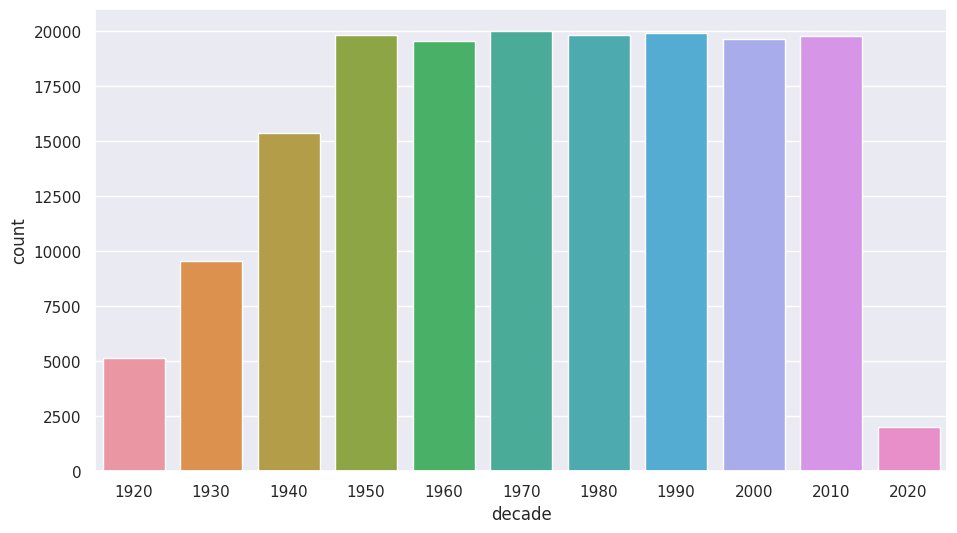

In [9]:
# Create the 'decade' column if it doesn't exist
data['decade'] = pd.to_datetime(data['year'], format='%Y').dt.year // 10 * 10

# Convert 'decade' column to categorical data
data['decade'] = pd.Categorical(data['decade'])

# Set the figure size
sns.set(rc={'figure.figsize':(11, 6)})

# Create the count plot
sns.countplot(data=data, x='decade')

In [10]:
# Combining the datasets for convinent access
datasets = [("data", data), ("genre_data", genre_data), ("year_data", year_data), ("artist_data", artist_data)]

Datatsets info

In [11]:
for name, df in datasets:
    # print some info about the datasets
    print(f"Info about the dataset: {name}")
    print("-"*30)
    print(df.info())
    print()

Info about the dataset: data
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   valence           170653 non-null  float64 
 1   year              170653 non-null  int64   
 2   acousticness      170653 non-null  float64 
 3   artists           170653 non-null  object  
 4   danceability      170653 non-null  float64 
 5   duration_ms       170653 non-null  int64   
 6   energy            170653 non-null  float64 
 7   explicit          170653 non-null  int64   
 8   id                170653 non-null  object  
 9   instrumentalness  170653 non-null  float64 
 10  key               170653 non-null  int64   
 11  liveness          170653 non-null  float64 
 12  loudness          170653 non-null  float64 
 13  mode              170653 non-null  int64   
 14  name              170653 non-null  objec

checking null value

In [12]:
for name, df in datasets:
    print(f"Missing Values in: {name}")
    print("-"*30)
    print(df.isnull().sum())
    print()

Missing Values in: data
------------------------------
valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
decade              0
dtype: int64

Missing Values in: genre_data
------------------------------
mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

Missing Values in: year_data
------------------------------
mode                0
year                0
acou

Checking duplicate value

In [13]:
for name, df in datasets:
    print(f"Duplicates in the dataset: {name}")
    print("-"*30)
    print(df.duplicated(keep=False).sum())
    print()

Duplicates in the dataset: data
------------------------------
0

Duplicates in the dataset: genre_data
------------------------------
0

Duplicates in the dataset: year_data
------------------------------
0

Duplicates in the dataset: artist_data
------------------------------
0



Checking unique value

In [14]:
for name, df in datasets:
    print(f"Unique Values in: {name}")
    print("-"*30)
    print(df.nunique())
    print()

Unique Values in: data
------------------------------
valence               1733
year                   100
acousticness          4689
artists              34088
danceability          1240
duration_ms          51755
energy                2332
explicit                 2
id                  170653
instrumentalness      5401
key                     12
liveness              1740
loudness             25410
mode                     2
name                133638
popularity             100
release_date         11244
speechiness           1626
tempo                84694
decade                  11
dtype: int64

Unique Values in: genre_data
------------------------------
mode                   2
genres              2973
acousticness        2798
danceability        2725
duration_ms         2872
energy              2778
instrumentalness    2731
liveness            2709
loudness            2873
speechiness         2707
tempo               2872
valence             2745
popularity          2188
key    

Visualize data

In [15]:
# Popularity Trends Over Years
fig = px.line(year_data, x='year', y='popularity', title='Popularity Trends Over the Years', labels={'year': 'Years', 'popularity': "Popularity"})
fig.show()

No of songs released by decades

In [16]:
# Convert 'release_date' column to datetime format
data['release_date'] = pd.to_datetime(data['release_date'], format='mixed')

# Create a new column 'release_decade' representing the decade of the release
data['release_decade'] = (data['release_date'].dt.year // 10) * 10

# Count the number of songs per decade
decade_counts = data['release_decade'].value_counts().sort_index()

#Creating a bar chart for songs per decade
fig = px.bar(x=decade_counts.index, y=decade_counts.values, labels={'x': 'Decade', 'y': 'Number of Songs', 'color':"Color"},
             title='Number of Songs Released per Decade', color=decade_counts.index, color_continuous_scale='Rainbow')
fig.update_layout(xaxis_type='category')
fig.show()

Top Genres by Popularity

In [17]:
top_10_genre_data = genre_data.nlargest(10, 'popularity')

fig = px.bar(top_10_genre_data, x='popularity', y='genres', orientation='h',
             title='Top Genres by Popularity', color='genres', labels={'popularity': 'Popularity', "genres":"Genres"})
fig.show()

Top artists by popularity

In [18]:
top_10_artist_data = artist_data.nlargest(10, 'popularity')

fig = px.bar(top_10_artist_data, x='popularity', y='artists', orientation='h',
             title='Top Artists by Popularity', color='artists', labels={'popularity': 'Popularity', "artists":"Artists"})
fig.show()

Top songs by popularity

In [19]:
top_songs = data.nlargest(10, 'popularity')

fig = px.bar(top_songs, x='popularity', y='name', orientation='h',
             title='Top Songs by Popularity', color='name', labels={'popularity': 'Popularity', "name":"Name"})
fig.show()

**Music Recommendation System**

In [20]:
# Function to retrieve song data for a given song name
def get_song_data(name, data):
    try:
        return data[data['name'].str.lower() == name].iloc[0]
        return song_data
    except IndexError:
        return None

In [21]:
# Function to calculate the mean vector of a list of songs
def get_mean_vector(song_list, data):
    song_vectors = []
    for song in song_list:
        song_data = get_song_data(song['name'], data)
        if song_data is None:
            print('Warning: {} does not exist in the dataset'.format(song['name']))
            return None
        song_vector = song_data[number_cols].values
        song_vectors.append(song_vector)
    song_matrix = np.array(list(song_vectors))
    return np.mean(song_matrix, axis=0)

In [22]:
# Function to flatten a list of dictionaries into a single dictionary
def flatten_dict_list(dict_list):
    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []
    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)
    return flattened_dict

In [23]:
# List of numerical columns to consider for similarity calculations
number_cols = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'year',
               'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

In [24]:
# Normalize the song data using Min-Max Scaler
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data[number_cols])

# Standardize the normalized data using Standard Scaler
standard_scaler = StandardScaler()
scaled_normalized_data = standard_scaler.fit_transform(normalized_data)

In [25]:
# Function to recommend songs based on a list of seed songs
def recommend_songs(seed_songs, data, n_recommendations=10):
    metadata_cols = ['name', 'artists', 'year']
    song_center = get_mean_vector(seed_songs, data)
    
    # Return an empty list if song_center is missing
    if song_center is None:
        return []
    
    # Normalize the song center
    normalized_song_center = min_max_scaler.transform([song_center])
    
    # Standardize the normalized song center
    scaled_normalized_song_center = standard_scaler.transform(normalized_song_center)
    
    # Calculate Euclidean distances and get recommendations
    distances = cdist(scaled_normalized_song_center, scaled_normalized_data, 'euclidean')
    index = np.argsort(distances)[0]
    
    # Filter out seed songs and duplicates, then get the top n_recommendations
    rec_songs = []
    for i in index:
        song_name = data.iloc[i]['name']
        if song_name not in [song['name'] for song in seed_songs] and song_name not in [song['name'] for song in rec_songs]:
            rec_songs.append(data.iloc[i])
            if len(rec_songs) == n_recommendations:
                break
    
    return pd.DataFrame(rec_songs)[metadata_cols].to_dict(orient='records')

In [26]:
# List of seed songs (replace with your own seed songs)
seed_songs = [
    {'name': 'Eşin Var âşiyâ Var'},
    {'name': "It's the Same Old Shillelegh"},
    # Add more seed songs as needed
]
seed_songs = [{'name': name['name'].lower()} for name in seed_songs]

# Number of recommended songs
n_recommendations = 20

# Call the recommend_songs function
recommended_songs = recommend_songs(seed_songs, data, n_recommendations)

# Convert the recommended songs to a DataFrame
recommended_df = pd.DataFrame(recommended_songs)

# Print the recommended songs
for idx, song in enumerate(recommended_songs, start=1):
    print(f"{idx}. {song['name']} by {song['artists']} ({song['year']})")

1. At The Fat Man's by ['Tommy Dorsey'] (1925)
2. Ταξίμ Ραστ by ['Λάμπρος Σαββαίδης', 'Αγάπιος Τομπούλης', 'Δημήτρης Σέμσης'] (1930)
3. Μανωλάκης ο χασικλης by ['Κώστας Δούσιας'] (1930)
4. Death Letter Blues - Part 2 (Take 1) by ['Lead Belly'] (1935)
5. La Lechuga en el Huerto (Cueca) by ['Los Indios', 'Conjunto 31 de Octubre'] (1930)
6. Death Letter Blues - Part 1 (Take 1) by ['Lead Belly'] (1935)
7. Cannon Ball Blues (Take 1) by ['Jelly Roll Morton & His Red Hot Peppers'] (1926)
8. Bye Bye Blackbird by ['Harry Curtis'] (1923)
9. Με κάποια στα Πετράλωνα by ['Stellakis Perpiniadis'] (1933)
10. Kainourios Eros by ['Soula Karagiorgi'] (1930)
11. I'm Crazy 'Bout My Baby by ['Louis Armstrong'] (1930)
12. Please Don't Wake It Up by ['Mississippi Sheiks'] (1930)
13. Hortensia Ou La Fille Du Jazz Band by ['Georgius'] (1925)
14. I've Got Blood In My Eyes For You by ['Mississippi Sheiks'] (1930)
15. Marioneta by ['Carlos Gardel'] (1930)
16. Έλα να μου πεις μικρό μου by ['Rena Stamou', 'Prodromo

This code receives a list of seed songs, uses the seeds and a dataset of songs to make recommendations. It turns the suggestions into a DataFrame, and publishes the recommended songs along with their details.
This is a tool to help create and arrange song recommendations based on a predetermined list of seed tracks and an extensive song dataset.